# `numpy` practice

In [1]:
import numpy as np

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

In [2]:
#numpy №6
# Create a null vector of size 10 but the fifth value which is 1
(np.arange(10) == 4).astype(int)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [3]:
#numpy №8
# Reverse a vector (first element becomes last)
arr = np.arange(10)
np.flip(arr, 0)

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [4]:
#numpy №9
#Create a 3x3 matrix with values ranging from 0 to 8
np.arange(9).reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [5]:
#numpy №19
# Create a 8x8 matrix and fill it with a checkerboard pattern
np.array(([1,0]*4+[0,1]*4)*4).reshape((8,8))

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [6]:
#numpy №44
#Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates
cart = np.random.random((10,2))
print(cart)
pol = np.array((np.sqrt(cart[:,0]**2+cart[:,1]**2), np.arctan2(cart[:,1],cart[:,0]))).T
pol

[[0.32468321 0.17300391]
 [0.77200698 0.83502401]
 [0.13180863 0.77747292]
 [0.24789114 0.66657356]
 [0.61587574 0.83784966]
 [0.15609037 0.6120889 ]
 [0.44795445 0.06277375]
 [0.54527769 0.79387466]
 [0.47471121 0.78805566]
 [0.22253262 0.83922288]]


array([[0.36789882, 0.48957247],
       [1.13721584, 0.82459141],
       [0.78856684, 1.40285845],
       [0.71117532, 1.21475621],
       [1.03985335, 0.93692096],
       [0.63167795, 1.32110553],
       [0.45233144, 0.13922758],
       [0.96310162, 0.96894632],
       [0.91999047, 1.02862658],
       [0.86822567, 1.31159633]])

In [7]:
def snail_curve(a):
    phi = np.linspace(-2*np.pi, 2*np.pi, 201)

    r = a + np.cos(phi)

    x = r * np.cos(phi)
    y = r * np.sin(phi)

    import matplotlib.pyplot as plt
    plt.plot(x, y)
    plt.show()

In [8]:
#snail curve a = 0.3
a = 0.3
snail_curve(a)

<Figure size 640x480 with 1 Axes>

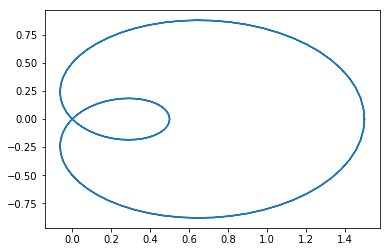

In [9]:
#snail curve a = 0.5
a = 0.5
snail_curve(a)

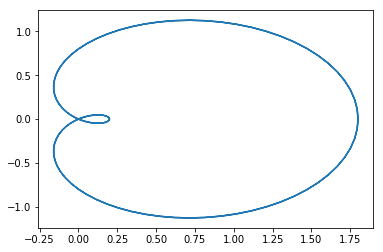

In [10]:
#snail curve a = 0.3
a = 0.8
snail_curve(a)

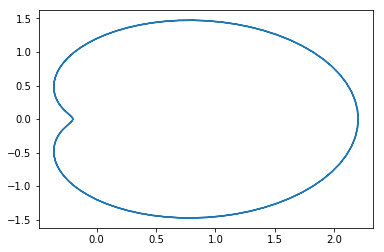

In [11]:
#snail curve a = 0
a = 1.2
snail_curve(a)

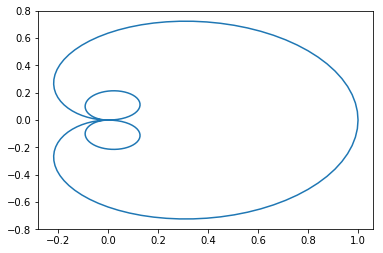

In [12]:
#cochleoid curve
phi = np.linspace(-2*np.pi, 2*np.pi, 201)

phi = np.where(phi != 0, phi, 1)
r = np.sin(phi) / phi

x = r * np.cos(phi)
y = r * np.sin(phi)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [13]:
#Cauchy matrix
np.set_printoptions(precision=3)

u = np.arange(4)
v = u + 0.5
    
A_ = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        A_[i, j] = 1. / (u[i] - v[j])
A_

array([[-2.   , -0.667, -0.4  , -0.286],
       [ 2.   , -2.   , -0.667, -0.4  ],
       [ 0.667,  2.   , -2.   , -0.667],
       [ 0.4  ,  0.667,  2.   , -2.   ]])

In [14]:
#Cauchy matrix broadcasting
np.set_printoptions(precision=3)

u = np.arange(4)
v = u + 0.5
    
A_ = 1.0 / (u[:, None] - v)
A_

array([[-2.   , -0.667, -0.4  , -0.286],
       [ 2.   , -2.   , -0.667, -0.4  ],
       [ 0.667,  2.   , -2.   , -0.667],
       [ 0.4  ,  0.667,  2.   , -2.   ]])

In [15]:
#Cauchy matrix
np.set_printoptions(precision=3)

u = np.arange(4)
v = u + 0.5
    
A_ = 1 / np.subtract.outer(u,v)
A_

array([[-2.   , -0.667, -0.4  , -0.286],
       [ 2.   , -2.   , -0.667, -0.4  ],
       [ 0.667,  2.   , -2.   , -0.667],
       [ 0.4  ,  0.667,  2.   , -2.   ]])

In [16]:
def findF(m1, m2, r, G):
    F = G * m1 * m2 / (r ** 2)
    return F

In [17]:
def findFEr(m1, m1er, m2, m2er, r, rer, G):
    F = findF(m1, m2, r, G)
    Fer = F * np.sqrt(((m1er / m1) ** 2) + ((m2er / m2) ** 2) + ((r * 2 * rer) ** 2))
    return (F, Fer)

In [18]:
def make_plot_montecarlo(m1, m1er, m2, m2er, r, rer, G):
    F, Fer = findFEr(m1, m1er, m2, m2er, r, rer, G)
    print('F = ', F, '; deviation = ', Fer)
    m1_arr = m1 + 2 * m1er * np.random.random_sample(1000000) - m1er
    m2_arr = m2 + 2 * m2er * np.random.random_sample(1000000) - m2er
    r_arr = r + 2 * rer * np.random.random_sample(1000000) - rer
    res = findFEr(m1_arr, m1er, m2_arr, m2er, r_arr, rer, G)
    counts, bins = np.histogram(res[0])
    plt.hist(bins[:-1], bins, weights=counts)
    plt.show()

In [19]:
#standard error propagation rules 
m1 = 40 * 1e4
m1er = 0.05 * 1e4
m2 = 30 * 1e4
m2er = 0.1 * 1e4
r = 3.2
rer = 0.01
G = 6.67384 * 1e-11

F =  0.7820906249999999 ; deviation =  0.05013117700823662


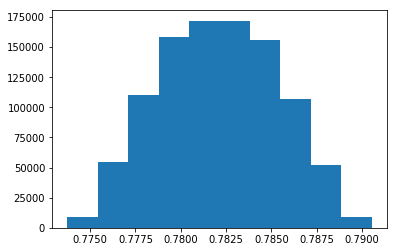

In [20]:
make_plot_montecarlo(m1, m1er, m2, m2er, r, rer, G)

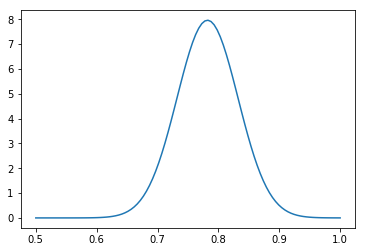

In [21]:
def gaussian(x, mu, sig):
    return 1/(np.sqrt(2*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2)/2)

F, Fer = findFEr(m1, m1er, m2, m2er, r, rer, G)
x_values = np.linspace(0.5, 1, 100)
plt.plot(x_values, gaussian(x_values, F, Fer))

plt.show()

In [22]:
m1er = 2 * 1e4
m2er = 10 * 1e4
rer = 1

F =  0.7820906249999999 ; deviation =  5.012316926272624


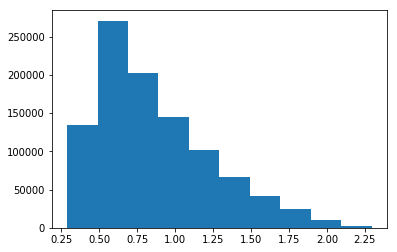

In [23]:
make_plot_montecarlo(m1, m1er, m2, m2er, r, rer, G)

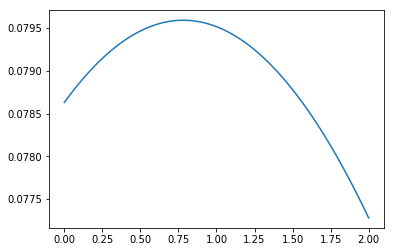

In [24]:
F, Fer = findFEr(m1, m1er, m2, m2er, r, rer, G)
x_values = np.linspace(0, 2, 100)
plt.plot(x_values, gaussian(x_values, F, Fer))

plt.show()